## 专题一 数据结构

In [1]:
record = ('Dave', "dave@example.com", "773-555-1215", '847-956-845')

In [2]:
name, email, *phone = record

In [3]:
name

'Dave'

In [4]:
email

'dave@example.com'

In [5]:
phone

['773-555-1215', '847-956-845']

In [6]:
path = r'E:\OpenSource\github\noise2noise'

In [22]:
*_, file = path.split('\\')

In [23]:
file

'noise2noise'

In [21]:
path.split('\\')[-1]

'noise2noise'

### (0) heapq的使用：

In [24]:
from collections import deque

In [25]:
q = deque(maxlen=3)

In [26]:
q.append(1)

In [27]:
q.append(34)

In [28]:
q.append(32)

In [29]:
q

deque([1, 34, 32])

In [30]:
q.append(1223)

In [31]:
q

deque([34, 32, 1223])

In [32]:
q.append(5)

In [33]:
q

deque([32, 1223, 5])

In [35]:
a_list = [x for x in range(10)]#生成的是列表
print(type(a_list))
b = (x for x in range(10))#生成的是生成器
print(type(b))

<class 'list'>
<class 'generator'>


### （1）怎样从一个集合中找出最大或者最小的N个元素:

In [36]:
import heapq

In [37]:
num = [12,586,92,-6,5892,741,63,21,78,91]
print(heapq.nlargest(3,num))
print(heapq.nsmallest(3,num))

[5892, 741, 586]
[-6, 12, 21]


In [38]:
heapq.nlargest?

In [39]:
personinfo = [
    {"name":"lily", "gender":'female',"score":89.65},
    {"name":"john", "gender":'male',"score":99.15},
    {"name":"bob", "gender":'male',"score":78.23},
    {"name":"alice", "gender":'female',"score":85.25},
    {"name":"mike", "gender":'male',"score":92.67},
    {"name":"rose", "gender":'female',"score":87.88}
    
]

In [42]:
print(heapq.nlargest(3, personinfo, key=lambda s: s['score']))
print("----------")
print(heapq.nsmallest(3, personinfo, key=lambda s: s['score']))

[{'name': 'john', 'gender': 'male', 'score': 99.15}, {'name': 'mike', 'gender': 'male', 'score': 92.67}, {'name': 'lily', 'gender': 'female', 'score': 89.65}]
----------
[{'name': 'bob', 'gender': 'male', 'score': 78.23}, {'name': 'alice', 'gender': 'female', 'score': 85.25}, {'name': 'rose', 'gender': 'female', 'score': 87.88}]


In [43]:
heapq.heapify(num)

In [44]:
num

[-6, 12, 63, 21, 91, 741, 92, 586, 78, 5892]

In [45]:
heapq.heappop(num)

-6

In [46]:
heapq.heappop(num)

12

In [47]:
heapq.heappop(num)

21

### （2）实现一个优先级队列

In [76]:
import heapq
class PriorityQeue:
    def __init__(self):
        self._queue = []
        self._index = 0
        
    def push(self, item, priority):
        heapq.heappush(self._queue, (-priority, self._index, item))
        self._index += 1
    
    def pop(self):
        return heapq.heappop(self._queue)[-1]

In [77]:
class Item:
    def __init__(self, name):
        self.name = name
        
    def __repr__(self):
        return "Item({0})".format(self.name)

In [78]:
q = PriorityQeue()

In [79]:
q.push(Item("bar"), 1)
q.push(Item("foo"), 2)
q.push(Item("dog"), 5)
q.push(Item("cat"), 1)

In [80]:
print(q.pop())

Item(dog)


In [81]:
heapq.heappush?

In [83]:
a = (1,Item('bar'))
b = (2,Item('foo'))
a < b

True

In [84]:
a = (1,Item('bar'))
b = (1,Item('foo'))
a < b

TypeError: '<' not supported between instances of 'Item' and 'Item'

### (3) 实现一个键对应多个值得字典

In [85]:
d = {"a": [5,8,6], "b":[7,9]} #使用列表，可重复，有序

In [86]:
d['a']

[5, 8, 6]

In [89]:
e = {"a":{5,8,6,6}, 'b':{7,9}} #使用集合，不可重复

In [88]:
e['a']

{5, 6, 8}

使用defaultdict来构造这样的字典

In [90]:
from collections import defaultdict

In [91]:
d = defaultdict(list) #使用列表 可重复

In [92]:
d['a'].append(1)
d['a'].append(2)
d['a'].append(3)

In [93]:
d['a']

[1, 2, 3]

In [94]:
d = defaultdict(set) #使用集合


In [96]:
d['a'].add(1)
d['a'].add(2)
d['a'].add(3)

In [97]:
d['a']

{1, 2, 3}

In [98]:
d['b']

set()

### (4) 创建一个有序的字典:

In [99]:
from collections import OrderedDict

In [100]:
d = OrderedDict()
d['foo'] = 1
d['bar'] = 2
d['spam'] = 4
d['grok'] = 5

In [101]:
for key in d:
    print(key, d[key])

foo 1
bar 2
spam 4
grok 5


In [102]:
import json

In [104]:
json.dumps(d)

'{"foo": 1, "bar": 2, "spam": 4, "grok": 5}'

### (5) 对字典进行运算

In [105]:
prices = {
    "ACME": 45.23,
    "AAPL": 612.69,
    "IBM": 205.55,
    "HPQ": 37.20,
    "FB": 10.75
}

In [106]:
names = ['lily', 'john', 'rose']
ages = [25,21,18,26]
for name,age in zip(names, ages):
    print(name, age)

lily 25
john 21
rose 18


使用zip()先将字典的键和值倒过来再操作：

In [110]:
min_price = min(zip(prices.values(), prices.keys()))
print(min_price)

max_price = max(zip(prices.values(), prices.keys()))
print(max_price)

(10.75, 'FB')
(612.69, 'AAPL')


In [111]:
prices_sorted = sorted(zip(prices.values(), prices.keys()))
print(prices_sorted)

[(10.75, 'FB'), (37.2, 'HPQ'), (45.23, 'ACME'), (205.55, 'IBM'), (612.69, 'AAPL')]


注意：zip()函数只会产生一个只能使用一次的迭代器，例如下面的例子将会报错：

In [114]:
prices_names = zip(prices.values(), prices,prices.keys())
print(min(prices_names)) #成功执行
print(max(prices_names)) #报错:ValueError: max() arg is an empty sequence

(10.75, 'FB', 'FB')


ValueError: max() arg is an empty sequence

直接对字典执行普通的数学操作,只会作用于键：

In [115]:
print(min(prices))
print(max(prices))

AAPL
IBM


使用字典的values()方法来操作会如何呢:

In [116]:
print(min(prices.values()))
print(max(prices.values()))

10.75
612.69


显然这并不是我们想要的结果，因为我们可能还想得到键的信息。

通过在min()和max()函数的key参数可以修改排序的规则:

In [117]:
print(min(prices, key=lambda x: prices[x]))
print(max(prices, key=lambda x: prices[x]))

FB
AAPL


In [118]:
prices

{'ACME': 45.23, 'AAPL': 612.69, 'IBM': 205.55, 'HPQ': 37.2, 'FB': 10.75}

### (6) 查找字典的相似之处，比如相同的键或者值

In [129]:
a = {
    'x': 1,
    'y': 2,
    'z': 3
}

b = {
    'w': 12,
    'y': 2,
    'z': 2
}

In [131]:
print(a.keys() & b.keys()) #找出相同的键
print(a.keys() - b.keys()) #找出在a中但不在b的键
print(a.items() & b.items()) #找出键值相同的

{'y', 'z'}
{'x'}
{('y', 2)}


>引用文字

使用字典推导式:
    

In [132]:
c = {key: a[key] for key in a.keys() - {'z', 'w'}} #过滤键为'z'和'w'

In [133]:
c

{'x': 1, 'y': 2}

>总结：字典的一个很少被了解的特性是它的键支持集合操作（交，并，差），同时字典的items()返回的一个(键，值)对的元素视图也支持集合操作。<br>
注意：字典的values()方法并不支持集合操作!!

### (7) 删除序列相同的元素并保持顺序

如果序列中值是hashable类型的，那么可以简单的利用集合或者生成器来实现：

In [135]:
def dedupe(items):
    seen = set()
    for item in items:
        if item not in seen:
            yield item
            seen.add(item)

In [136]:
a = [1,5,2,1,9,1,5,10]

In [137]:
list(dedupe(a))

[1, 5, 2, 9, 10]

如果想消除元素不可哈希（比如dict类型，list类型）的序列的元素的话，需要做一个改动：

In [138]:
def dedupe(items, key=None):
    seen = set()
    for item in items:
        val = item if key is None else key(item)
        if val not in seen:
            yield item
            seen.add(val)

In [139]:
a = [{'x':1, 'y':2}, {'x':1, 'y':3}, {'x':1, 'y':2}, {'x':2, 'y':4}]

In [140]:
list(dedupe(a, key=lambda d:(d['x'], d['y'])))

[{'x': 1, 'y': 2}, {'x': 1, 'y': 3}, {'x': 2, 'y': 4}]

如果仅仅想消除重复，而不关心顺序，可使用set()来解决：

In [141]:
a = [1,5,2,1,9,1,5,10]
print(set(a))

{1, 2, 5, 9, 10}


### (8) 使用命名切片解决硬编码难理解的问题

假设有一段代码需要从一个记录字符串的固定位置提取出特定的数据字段

record = '..............120................856.3562'<br>
cost = int(record[10:15]) * float(record[52:65])

与其那样写，不如使用命名切片使程序更容易理解:

SHARES = slice(10, 15) <br>
PRICE = slice(52, 65) <br>
cost = int(record[SHARES]) * float(record[PRICE]) <br>

>注意：slice()是一个函数，而不是类实例化。当然在Python中，一切皆是对象。

内置的slice()函数创建了一个切片对象，该对象可以用在任何可以使用切片的地方。切片对象有start，stop和step属性。

In [142]:
a = slice(1,20,5)

In [143]:
a.start

1

In [144]:
a.stop

20

In [145]:
a.step

5

### (9) 序列中出现次数最多的元素

In [146]:
from collections import Counter

In [159]:
words = ['look', 'at', 'my', 'eyes', 'look', 'at', 'my', 'eyes',
          'tell me', 'what', 'do', 'you', 'see', 'hey', 'look', 'at',
         'me', 'are', 'you', 'deaf', 'you', 'son', 'of', 'bitch', 'tell',
         'me', 'son', 'you', 'did', 'understand', 'me', 'and', 'repeat',
         'my', 'words', 'ok', 'are', 'do', 'you', 'listen', 'to', 'me'
        ]

In [160]:
word_counts = Counter(words)

In [161]:
top_three = word_counts.most_common(3)

In [162]:
print(top_three)

[('you', 5), ('me', 4), ('look', 3)]


In [164]:
word_counts['at']

3

### (10) 通过字典的某个或多个字段进行排序

In [165]:
rows = [
    {'name':'lily', 'age':25, 'gender':'female', 'uid':1001},
    {'name':'rose', 'age':21, 'gender':'female', 'uid':1005},
    {'name':'john', 'age':28, 'gender':'male', 'uid':1003},
    {'name':'charly', 'age':22, 'gender':'male', 'uid':1008}
]

In [166]:
from operator import itemgetter

In [170]:
rows_by_name = sorted(rows, key=itemgetter('name'))
rows_by_id = sorted(rows, key=itemgetter('uid'))
rows_by_age = sorted(rows, key=itemgetter('age'))
rows_by_name_age = sorted(rows, key=itemgetter('name', 'age'))

print(rows_by_name)
print('----------')
print(rows_by_id)

print('---------')
print(rows_by_age)

print('---------')
print(rows_by_name_age)

[{'name': 'charly', 'age': 22, 'gender': 'male', 'uid': 1008}, {'name': 'john', 'age': 28, 'gender': 'male', 'uid': 1003}, {'name': 'lily', 'age': 25, 'gender': 'female', 'uid': 1001}, {'name': 'rose', 'age': 21, 'gender': 'female', 'uid': 1005}]
----------
[{'name': 'lily', 'age': 25, 'gender': 'female', 'uid': 1001}, {'name': 'john', 'age': 28, 'gender': 'male', 'uid': 1003}, {'name': 'rose', 'age': 21, 'gender': 'female', 'uid': 1005}, {'name': 'charly', 'age': 22, 'gender': 'male', 'uid': 1008}]
---------
[{'name': 'rose', 'age': 21, 'gender': 'female', 'uid': 1005}, {'name': 'charly', 'age': 22, 'gender': 'male', 'uid': 1008}, {'name': 'lily', 'age': 25, 'gender': 'female', 'uid': 1001}, {'name': 'john', 'age': 28, 'gender': 'male', 'uid': 1003}]
---------
[{'name': 'charly', 'age': 22, 'gender': 'male', 'uid': 1008}, {'name': 'john', 'age': 28, 'gender': 'male', 'uid': 1003}, {'name': 'lily', 'age': 25, 'gender': 'female', 'uid': 1001}, {'name': 'rose', 'age': 21, 'gender': 'fema

>通常itemgetter()也会被lambda表达式取代。

In [173]:
rows_by_name = sorted(rows, key=lambda u:u['name'])
rows_by_id = sorted(rows, key=lambda u:u['uid'])
rows_by_age = sorted(rows, key=lambda u:u['age'])
rows_by_name_age = sorted(rows, key=lambda u:(u['name'],u['age']))

print(rows_by_name)
print('----------')
print(rows_by_id)

print('---------')
print(rows_by_age)

print('---------')
print(rows_by_name_age)

[{'name': 'charly', 'age': 22, 'gender': 'male', 'uid': 1008}, {'name': 'john', 'age': 28, 'gender': 'male', 'uid': 1003}, {'name': 'lily', 'age': 25, 'gender': 'female', 'uid': 1001}, {'name': 'rose', 'age': 21, 'gender': 'female', 'uid': 1005}]
----------
[{'name': 'lily', 'age': 25, 'gender': 'female', 'uid': 1001}, {'name': 'john', 'age': 28, 'gender': 'male', 'uid': 1003}, {'name': 'rose', 'age': 21, 'gender': 'female', 'uid': 1005}, {'name': 'charly', 'age': 22, 'gender': 'male', 'uid': 1008}]
---------
[{'name': 'rose', 'age': 21, 'gender': 'female', 'uid': 1005}, {'name': 'charly', 'age': 22, 'gender': 'male', 'uid': 1008}, {'name': 'lily', 'age': 25, 'gender': 'female', 'uid': 1001}, {'name': 'john', 'age': 28, 'gender': 'male', 'uid': 1003}]
---------
[{'name': 'charly', 'age': 22, 'gender': 'male', 'uid': 1008}, {'name': 'john', 'age': 28, 'gender': 'male', 'uid': 1003}, {'name': 'lily', 'age': 25, 'gender': 'female', 'uid': 1001}, {'name': 'rose', 'age': 21, 'gender': 'fema

对于不支持原生比较的对象，可以使用lambda表达式或者operator.attrgetter()来实现：

In [174]:
class Dog:
    def __init__(self, age):
        self.age = age
    
    def __repr__(self):
        return "Dog({0})".format(self.age)

In [176]:
dogs = [Dog(12), Dog(3),Dog(10)]

In [177]:
print(sorted(dogs, key=lambda d: d.age))

[Dog(3), Dog(10), Dog(12)]


或：

In [178]:
from operator import attrgetter
print(sorted(dogs, key=attrgetter('age')))

[Dog(3), Dog(10), Dog(12)]


可以看出，两者实现的效果是相同的。

假设有一组数据，我们想按照日期进行迭代，首先要对日期进行排序：

In [191]:
rows = [{'address': '5412 N CLARK', 'date': '07/01/2019'},
 {'address': '5148 N CLARK', 'date': '07/04/2019'},
 {'address': '5800 E 58TH', 'date': '07/02/2019'},
 {'address': '2122 N CLARK', 'date': '07/03/2019'},
 {'address': '5645 N RAVENSWOOD', 'date': '07/02/2019'},
 {'address': '1060 W ADDISON', 'date': '07/02/2019'},
 {'address': '4801 N BROADWAY', 'date': '07/01/2019'},
 {'address': '1039 W GRANVILLE', 'date': '07/04/2019'}]

In [192]:
from operator import itemgetter
from itertools import groupby
rows.sort(key=itemgetter('date'))

In [193]:
for date, it in groupby(rows, key=itemgetter('date')):
    print(date)
    for i in it:
        print(' ', i)


07/01/2019
  {'address': '5412 N CLARK', 'date': '07/01/2019'}
  {'address': '4801 N BROADWAY', 'date': '07/01/2019'}
07/02/2019
  {'address': '5800 E 58TH', 'date': '07/02/2019'}
  {'address': '5645 N RAVENSWOOD', 'date': '07/02/2019'}
  {'address': '1060 W ADDISON', 'date': '07/02/2019'}
07/03/2019
  {'address': '2122 N CLARK', 'date': '07/03/2019'}
07/04/2019
  {'address': '5148 N CLARK', 'date': '07/04/2019'}
  {'address': '1039 W GRANVILLE', 'date': '07/04/2019'}


### (12) 过滤

In [194]:
a = [12,52,63,-9,56,-921,87,-63,120,-960]

使用列表推导式将正负数分开：

In [196]:
positive = [n for n in a if n > 0]
print(positive)

[12, 52, 63, 56, 87, 120]


In [197]:
negative = [n for n in a if n < 0]
print(negative)

[-9, -921, -63, -960]


当数据量很大时，列表推导式会占用大量内存，这时候可以改用生成器实现过滤：


In [199]:
positive = (n for n in a if n > 0)
print(list(positive))

[12, 52, 63, 56, 87, 120]


In [201]:
negative = (n for n in a if n < 0)
print(list(negative))

[-9, -921, -63, -960]


如果过滤规则比较复杂，比如需要捕获异常时，通常将过滤规则使用函数实现,再结合内置的filter()函数实现：

In [209]:
values = ['12', '59', '*', 'NA', 526, '-589']
def is_int(val):
    try:
        x = int(val)
        return True
    except ValueError:
        return False
    

In [210]:
ivals = list(filter(is_int, values))
print(ivals)

['12', '59', 526, '-589']


In [211]:
s = ('ACME', 50, 123.58)
print(','.join(str(x) for x in s))

ACME,50,123.58


## 专题二 字符串和正则表达式

### （1）分割字符串

In [226]:
line = 'I am a boy; and you? I   am learning Advancde python,   which is wonderful.'

In [213]:
import re

In [228]:
ans = re.split(r'[;?.\s]\s*', line)

In [229]:
print(len(ans))
print(ans)

15
['I', 'am', 'a', 'boy', 'and', 'you', 'I', 'am', 'learning', 'Advancde', 'python,', 'which', 'is', 'wonderful', '']


>题外话：<br>纸牌的实现.

In [231]:
import collections

In [253]:
Card = collections.namedtuple("Card", ['rank', 'suit'])
class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    # spades:黑桃 heats:红桃 diamonds:方块 梅花:clubs
    suits = "spades diamonds clubs hearts".split()
    
    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                                        for rank in self.ranks]
    
    def __len__(self):
        return len(self._cards)
    
    def __getitem__(self, position):
        return self._cards[position]

In [254]:
beer_card = Card('7', 'diamonds')
print(beer_card)

Card(rank='7', suit='diamonds')


In [255]:
deck = FrenchDeck()
print(len(deck))

52


In [256]:
deck[0]

Card(rank='2', suit='spades')

随机抽取一张牌:

In [240]:
import random

In [257]:
random.choice(deck) # 随机抽取一张牌

Card(rank='7', suit='spades')

In [258]:
deck[:3]

[Card(rank='2', suit='spades'),
 Card(rank='3', suit='spades'),
 Card(rank='4', suit='spades')]

In [259]:
deck[12::13] # 此处不理解的话请看下面的输出[250]

[Card(rank='A', suit='spades'),
 Card(rank='A', suit='diamonds'),
 Card(rank='A', suit='clubs'),
 Card(rank='A', suit='hearts')]

In [260]:
deck._cards

[Card(rank='2', suit='spades'),
 Card(rank='3', suit='spades'),
 Card(rank='4', suit='spades'),
 Card(rank='5', suit='spades'),
 Card(rank='6', suit='spades'),
 Card(rank='7', suit='spades'),
 Card(rank='8', suit='spades'),
 Card(rank='9', suit='spades'),
 Card(rank='10', suit='spades'),
 Card(rank='J', suit='spades'),
 Card(rank='Q', suit='spades'),
 Card(rank='K', suit='spades'),
 Card(rank='A', suit='spades'),
 Card(rank='2', suit='diamonds'),
 Card(rank='3', suit='diamonds'),
 Card(rank='4', suit='diamonds'),
 Card(rank='5', suit='diamonds'),
 Card(rank='6', suit='diamonds'),
 Card(rank='7', suit='diamonds'),
 Card(rank='8', suit='diamonds'),
 Card(rank='9', suit='diamonds'),
 Card(rank='10', suit='diamonds'),
 Card(rank='J', suit='diamonds'),
 Card(rank='Q', suit='diamonds'),
 Card(rank='K', suit='diamonds'),
 Card(rank='A', suit='diamonds'),
 Card(rank='2', suit='clubs'),
 Card(rank='3', suit='clubs'),
 Card(rank='4', suit='clubs'),
 Card(rank='5', suit='clubs'),
 Card(rank='6', 

In [261]:
for card in reversed(deck):
    print(card)

Card(rank='A', suit='hearts')
Card(rank='K', suit='hearts')
Card(rank='Q', suit='hearts')
Card(rank='J', suit='hearts')
Card(rank='10', suit='hearts')
Card(rank='9', suit='hearts')
Card(rank='8', suit='hearts')
Card(rank='7', suit='hearts')
Card(rank='6', suit='hearts')
Card(rank='5', suit='hearts')
Card(rank='4', suit='hearts')
Card(rank='3', suit='hearts')
Card(rank='2', suit='hearts')
Card(rank='A', suit='clubs')
Card(rank='K', suit='clubs')
Card(rank='Q', suit='clubs')
Card(rank='J', suit='clubs')
Card(rank='10', suit='clubs')
Card(rank='9', suit='clubs')
Card(rank='8', suit='clubs')
Card(rank='7', suit='clubs')
Card(rank='6', suit='clubs')
Card(rank='5', suit='clubs')
Card(rank='4', suit='clubs')
Card(rank='3', suit='clubs')
Card(rank='2', suit='clubs')
Card(rank='A', suit='diamonds')
Card(rank='K', suit='diamonds')
Card(rank='Q', suit='diamonds')
Card(rank='J', suit='diamonds')
Card(rank='10', suit='diamonds')
Card(rank='9', suit='diamonds')
Card(rank='8', suit='diamonds')
Card(r

对扑克牌排序，排序规则：黑桃最大，红桃次之，方块再次，梅花最小。梅花2的大小是0，黑桃A的大小是51.下面按照这个规则来排序。

In [263]:
suit_values = dict(spades=3, hearts=2, diamonds=1, clubs=0)
def spades_high(card):
    rank_value = FrenchDeck.ranks.index(card.rank)
    return rank_value * len(suit_values) + suit_values[card.suit]

In [264]:
for card in sorted(deck, key=spades_high):
    print(card)

Card(rank='2', suit='clubs')
Card(rank='2', suit='diamonds')
Card(rank='2', suit='hearts')
Card(rank='2', suit='spades')
Card(rank='3', suit='clubs')
Card(rank='3', suit='diamonds')
Card(rank='3', suit='hearts')
Card(rank='3', suit='spades')
Card(rank='4', suit='clubs')
Card(rank='4', suit='diamonds')
Card(rank='4', suit='hearts')
Card(rank='4', suit='spades')
Card(rank='5', suit='clubs')
Card(rank='5', suit='diamonds')
Card(rank='5', suit='hearts')
Card(rank='5', suit='spades')
Card(rank='6', suit='clubs')
Card(rank='6', suit='diamonds')
Card(rank='6', suit='hearts')
Card(rank='6', suit='spades')
Card(rank='7', suit='clubs')
Card(rank='7', suit='diamonds')
Card(rank='7', suit='hearts')
Card(rank='7', suit='spades')
Card(rank='8', suit='clubs')
Card(rank='8', suit='diamonds')
Card(rank='8', suit='hearts')
Card(rank='8', suit='spades')
Card(rank='9', suit='clubs')
Card(rank='9', suit='diamonds')
Card(rank='9', suit='hearts')
Card(rank='9', suit='spades')
Card(rank='10', suit='clubs')
Ca

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


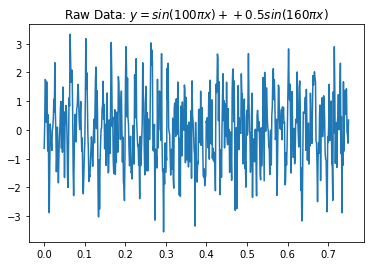

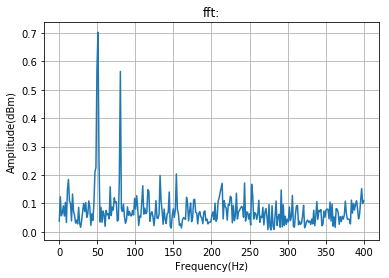

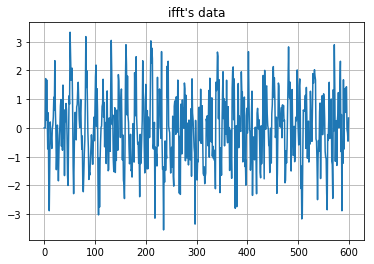

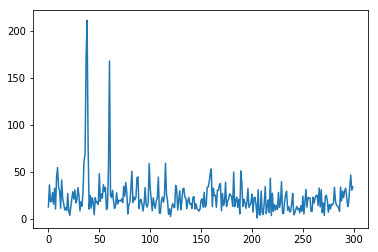

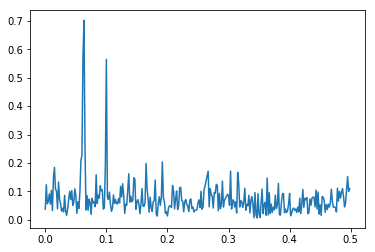

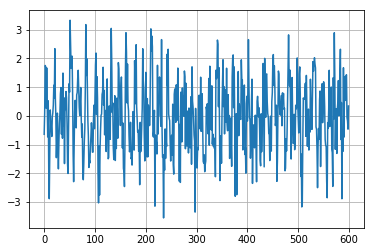

In [110]:
# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) + np.random.randn(N)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
plt.plot(x, y)
ax.set_title(r"Raw Data: $y = sin(100\pi x) + + 0.5sin(160\pi x)$")

fig, ax = plt.subplots()

#yf[0] = 0
#yf[yf<0.2] = 0
#freq = scipy.fftpack.fftfreq(len(yf), x[1] - x[0])
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
ax.set_title("fft:")
ax.set_xlabel("Frequency(Hz)")
ax.set_ylabel('Amplitude(dBm)')
plt.grid(True)


iyf = scipy.fftpack.ifft(yf)
iyf[:3] = 0
fig, ax = plt.subplots()
ax.plot(iyf)
ax.set_title(r"ifft's data")
plt.grid(True)



yf = scipy.fftpack.fft(iyf)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
fig, ax = plt.subplots()
plt.plot( np.abs(yf[:N//2]))



#numpy的fft
yf = np.fft.fft(y)
freq = np.fft.fftfreq(x.shape[-1])
fig, ax = plt.subplots()
ax.plot(freq[:N//2], 2/N * np.abs(yf[:N//2]))

iyf = np.fft.ifft(yf)
fig, ax = plt.subplots()
ax.plot(iyf)


plt.grid(True)
plt.show()


### fft的解释：

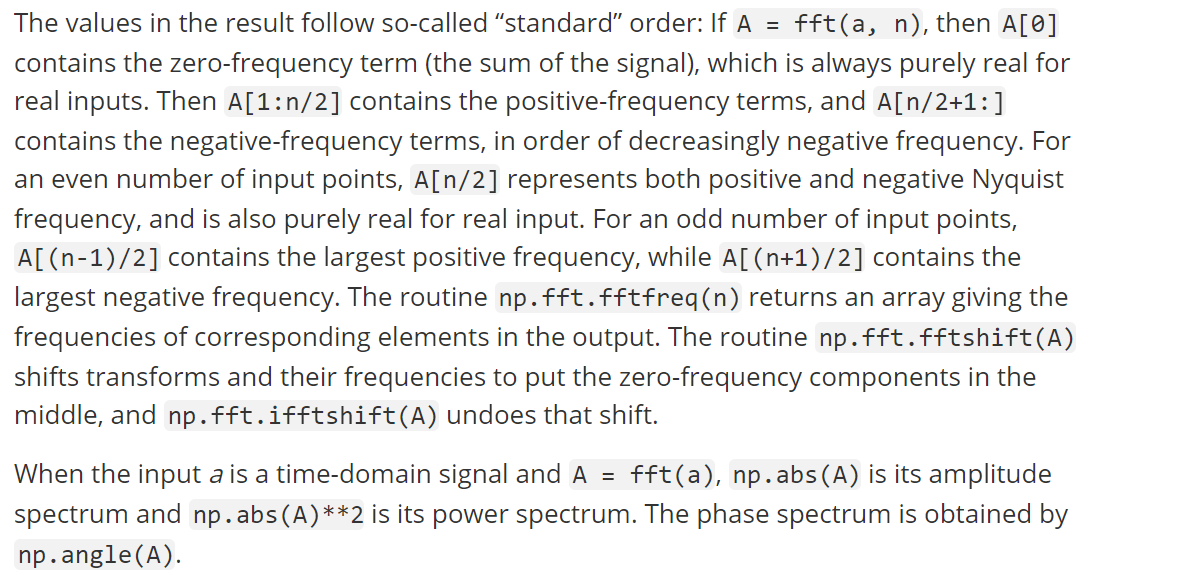

## DFT的讲解

Discrete Fourier Transform（DTF）的公式如下：

<font size=10>$X_{k} = \sum\limits_{n=0}^{N-1}x_{n}*e^{-i2\pi kn/N}$</font>

Inverse Discrete Fourier Transform (IDFT):

<font size=10>$x_n=\sum\limits_{k=0}^{N-1}X_k*e^{i2\pi kn/N}$</font>

从DFT的公式我们可以看出，DFT本质上就是一个矩阵$M$和一个向量$x$的乘积，即：<br>
$X=M*x$<br>其中$M$:<br>
$M_{kn}=e^{-i2\pi kn/N}$<br>
于是DFT可以实现如下:


In [93]:
import numpy as np
def DFT_slow(x):
    x = np.asarray(x, dtype=np.float64)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M,x)

In [94]:
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [95]:
%timeit DFT_slow(x)
%timeit np.fft.fft(x)

108 ms ± 5.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.83 µs ± 218 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


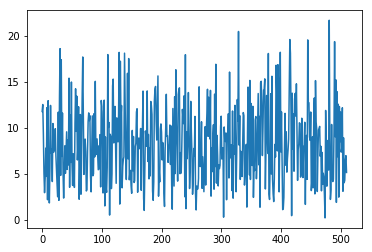

In [73]:
yf = MyDFT(x)
plt.subplots()
plt.plot(np.abs(yf[1:512]))# yf[0]是直流分量

plt.show()

In [97]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        #return X_even + factor * X_odd
        
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
                               X_even + factor[N // 2:] * X_odd])
                               

In [98]:
np.allclose(FFT(x), np.fft.fft(x))

True

In [100]:
%timeit DFT_slow(x)
%timeit FFT(x)
%timeit np.fft.fft(x)

110 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.18 ms ± 232 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.04 µs ± 136 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [105]:
def FFT_vectorized(x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] // 2]
        X_odd = X[:, X.shape[1] // 2:]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()

In [106]:
np.allclose(FFT_vectorized(x), np.fft.fft(x))

True

In [107]:
%timeit DFT_slow(x)
%timeit FFT(x)
%timeit FFT_vectorized(x)
%timeit np.fft.fft(x)

109 ms ± 5.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.02 ms ± 418 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
354 µs ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.77 µs ± 295 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<font size=6>再举个例子:</font>

In [18]:
t = np.linspace(0, 2*np.pi, 1000, endpoint=True)
f = 3.0 # Frequency in Hz
A = 100.0 #Amplitude in Unit
s = A * np.sin(2 * np.pi * f * t) #Signal


In [19]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


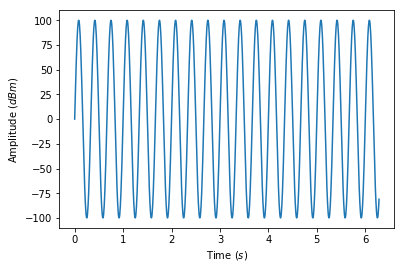

In [20]:
plt.subplots()
plt.plot(t, s)
plt.xlabel("Time ($s$)")
plt.ylabel('Amplitude ($dBm$)')
plt.show()

使用numpy.fft的包计算fft：

In [21]:
Y = np.fft.fft(s)

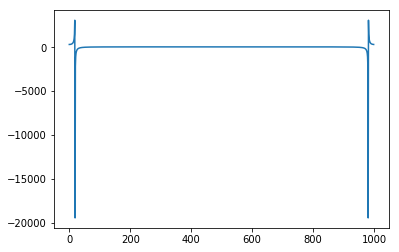

In [22]:
plt.plot(Y)

显然，该图形是镜像对称的。

In [23]:
Y[:5] #都是复数，绘图时我们只画Y的模值

array([308.66638939  +0.j        , 309.43311105 +33.02055315j,
       311.759413   +66.60327186j, 315.72596571+101.34272153j,
       321.47512397+137.90226936j])

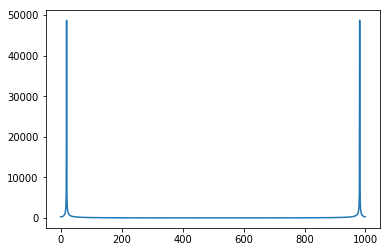

In [24]:
plt.plot(np.abs(Y))

In [31]:
N = len(Y) // 2  #fft的输出(Y)的长度的一半

幅度谱:

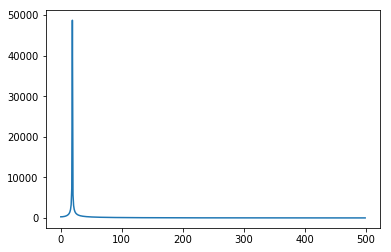

In [32]:
plt.plot(np.abs(Y[:N]))

计算FFT的频率轴:

In [45]:
dt = t[1] - t[0]
fa = 1.0 / dt
print("dt = {:.4}s (Sample Time)".format(dt))
print("fa={0:2}Hz (Frequency)".format(fa))

dt = 0.006289s (Sample Time)
fa=158.99578814880346Hz (Frequency)


In [46]:
X = np.linspace(0, fa/2, N, endpoint=True)

Text(0.5, 0, 'Frequency ($Hz$)')

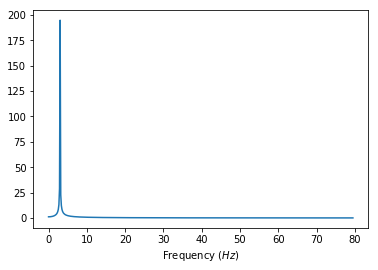

In [50]:
plt.plot(X, 2/N * np.abs(Y[:N]))
plt.xlabel("Frequency ($Hz$)")

加窗：

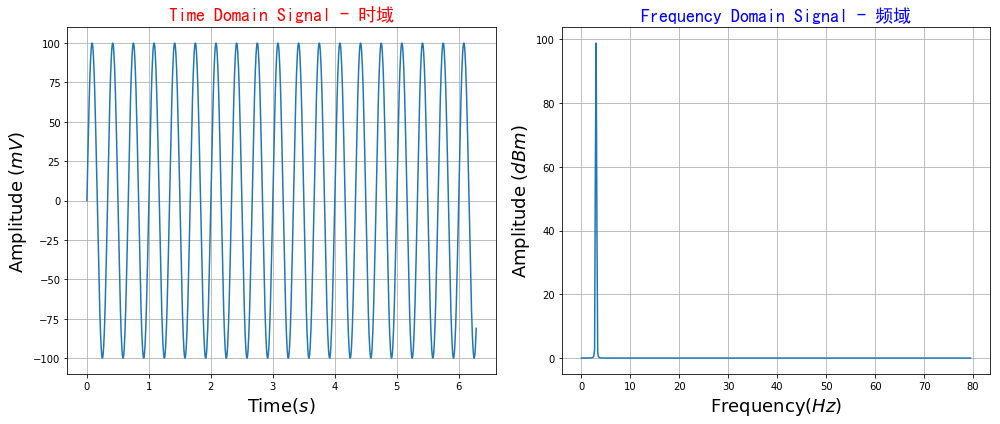

In [63]:
hann = np.hanning(len(s))  # 哈明窗
Yhann = np.fft.fft(hann * s)

plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.plot(t, s)
plt.title("Time Domain Signal - 时域", fontproperties="SimHei", color='red', size=18)
plt.xlabel("Time($s$)", size=18)
plt.ylabel("Amplitude ($mV$)", size=18)
plt.grid(True)

plt.subplot(122)
plt.plot(X, 2/N * np.abs(Yhann[:N]))
plt.title("Frequency Domain Signal - 频域", fontproperties="SimHei", color='blue', size=18)
plt.xlabel("Frequency($Hz$)", size=18)
plt.ylabel("Amplitude ($dBm$)", size=18)

plt.tight_layout()
plt.grid(True)
plt.show()

In [111]:
a = np.random.randint(1,10,size=(2,3,4))

In [112]:
a

array([[[3, 8, 7, 4],
        [8, 1, 8, 7],
        [1, 6, 5, 1]],

       [[3, 9, 2, 9],
        [5, 9, 7, 1],
        [8, 3, 2, 7]]])

In [129]:
a[:1,...]

array([[[3, 8, 7, 4],
        [8, 1, 8, 7],
        [1, 6, 5, 1]]])

In [116]:
np.dot(a, [1,2,3,5])

array([[60, 69, 33],
       [72, 49, 55]])

In [117]:
b = np.asarray([1,2,3,5])

In [119]:
print(a.shape)
print(b.shape)

(2, 3, 4)
(4,)


In [120]:
pwd

'E:\\OpenSource\\gitee\\DataAnalysis'

In [121]:
dog = plt.imread(r'E:\PyCharmProjects\icons\dog.jpg')

In [123]:
plt.imsave(r'E:\PyCharmProjects\icons\dog_gray.jpg', dog, format='jpeg', cmap='gray')

In [ ]:
dog_gray